## Leer los Datos Limpios

En primer lugar, se leen los datos limpios que se incluyen en el archivo "HalfProcessedDataset.csv", que se obtuvo como resultado de la Parte I de la limpieza de datos.

In [115]:
# Librerías a utilizar
import pandas as pd
import numpy as np
import random

In [116]:
data = pd.read_csv("Input/HalfProcessedDataset.csv", index_col=0, header=[0,1])
data.head(5)

SURESTE                                      NORESTE  \
                        NO2        O3   PM10     SO2  WSR    WDV     NO2   
2023-01-01 00:00:00  0.0326  0.003000  110.0  0.0035  3.2  257.0  0.0430   
2023-01-01 01:00:00  0.0303  0.003000  116.0  0.0034  3.3  278.0  0.0444   
2023-01-01 02:00:00  0.0288  0.003000  117.0  0.0036  3.7  278.0  0.0415   
2023-01-01 03:00:00  0.0291  0.003000  135.0  0.0038  3.6  197.0  0.0423   
2023-01-01 04:00:00  0.0257  0.003333  132.0  0.0036  4.9  271.0  0.0399   

                                           ...  NORTE                     \
                        O3   PM10     SO2  ...   PM10     SO2  WSR   WDV   
2023-01-01 00:00:00  0.007  222.0  0.0038  ...  522.0  0.0042  3.8  18.0   
2023-01-01 01:00:00  0.008  311.0  0.0240  ...  712.0  0.0040  4.5  15.0   
2023-01-01 02:00:00  0.007  723.0  0.0098  ...  586.0  0.0038  4.8  28.0   
2023-01-01 03:00:00  0.006  473.0  0.0078  ...  406.0  0.0037  2.8  26.0   
2023-01-01 04:00:00  0.005  372.0  0.0073  ...  340.0  0.0038  4.1  28.0   

                    NORTE 2                                    
                        NO2     O3   PM10     SO2  WSR    WDR  
2023-01-01 00:00:00  0.0498  0.014  228.0  0.0045  5.5  221.0  
2023-01-01 01:00:00  0.0473  0.013  478.0  0.0058  2.2  272.0  
2023-01-01 02:00:00  0.0431  0.011  566.0  0.0060  3.7  221.0  
2023-01-01 03:00:00  0.0421  0.011  498.0  0.0061  2.5  290.0  
2023-01-01 04:00:00  0.0404  0.011  483.0  0.0050  1.9  280.0  

[5 rows x 30 columns]

## Manejando Duplicados

In [117]:
print("La forma del dataset es", data.shape)
print("La cantidad de valores únicos en los índices es:",
      len(np.unique(data.index)))

La forma del dataset es (13863, 30)
La cantidad de valores únicos en los índices es: 13863


Con esto se observa que, como cabría esperar, todos los índices tienen datos diferentes, por lo que, aún si existiera un par de entradas muy parecidas, si pertenecen a diferentes puntos de una serie de tiempo, deben conservarse ambas. Aún así, para tranquilidad del lector, se hará una eliminación automática de los datos duplicados y se observará que no hubo cambios en la forma del dataset.

In [118]:
print("Las dimensiones del dataset después de eliminar duplicados son:", data.drop_duplicates().shape)

Las dimensiones del dataset después de eliminar duplicados son: (13863, 30)


## Transformación de Datos Propuesta

Se propone, para evitar el doble header y obtener una estructura más manejable y analizable de los datos, dividir el dataframe en una lista de 5 dataframes, tal que cada uno contenga la información correspondiente a una estación, siguiendo el orden:
- 0: "NORTE 2"
- 1: "NORTE"
- 2: "NORESTE"
- 3: "SURESTE"
- 4: "CENTRO"

In [119]:
names = ['NORTE 2', 'NORTE', 'NORESTE', 'SURESTE', 'CENTRO']
newData = []
for name in names:
    newData.append(data[name])

newData

[                        NO2     O3   PM10     SO2   WSR    WDR
 2023-01-01 00:00:00  0.0498  0.014  228.0  0.0045   5.5  221.0
 2023-01-01 01:00:00  0.0473  0.013  478.0  0.0058   2.2  272.0
 2023-01-01 02:00:00  0.0431  0.011  566.0  0.0060   3.7  221.0
 2023-01-01 03:00:00  0.0421  0.011  498.0  0.0061   2.5  290.0
 2023-01-01 04:00:00  0.0404  0.011  483.0  0.0050   1.9  280.0
 ...                     ...    ...    ...     ...   ...    ...
 2024-07-31 19:00:00  0.0172  0.017   99.0  0.0031  10.3  122.0
 2024-07-31 20:00:00  0.0158  0.019   98.0  0.0031  12.5  107.0
 2024-07-31 21:00:00  0.0190  0.020  101.0  0.0038  10.4   85.0
 2024-07-31 22:00:00  0.0190  0.020  101.0  0.0038  10.4   85.0
 2024-07-31 23:00:00  0.0190  0.020  101.0  0.0038  10.4   85.0
 
 [13863 rows x 6 columns],
                         NO2     O3   PM10     SO2   WSR    WDV
 2023-01-01 00:00:00  0.0432  0.012  522.0  0.0042   3.8   18.0
 2023-01-01 01:00:00  0.0411  0.009  712.0  0.0040   4.5   15.0
 2023-01-01

### Propuesta Alternativa

Se propone agregar una columna categórica correspondiente a la estación de la que procede cada entrada, esto permitiría combinar todos los dataframes en uno solo que sea bien manejable, facil de filtrar y de operar. Eso es posible en Python, pues Pandas permite índices duplicados. Aún no estoy seguro de que R tenga esa bondad.

### Una Pequeña Correción

La primera estación ("NORTE 2") tiene una diferencia, pues la variable correspondiente al tiempo se llama "WDR" en lugar de "WDV", como en todas las demás.

In [120]:
newData[0].rename(columns = {'WDR': 'WDV'}, inplace = True)

C:\Users\juanj\AppData\Local\Temp\ipykernel_2380\306540203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData[0].rename(columns = {'WDR': 'WDV'}, inplace = True)


## Algunas Visualizaciones



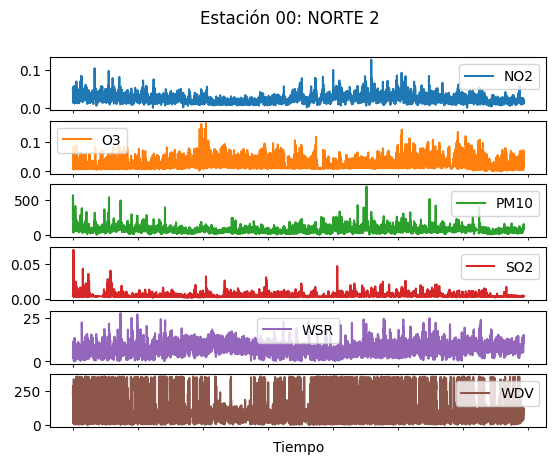

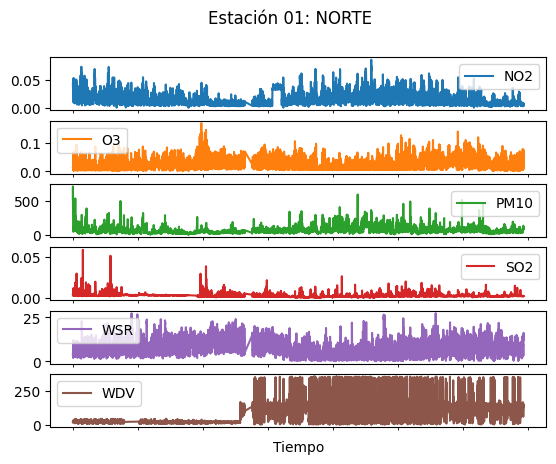

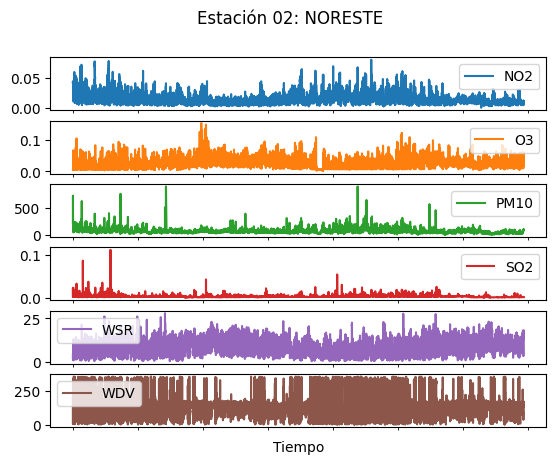

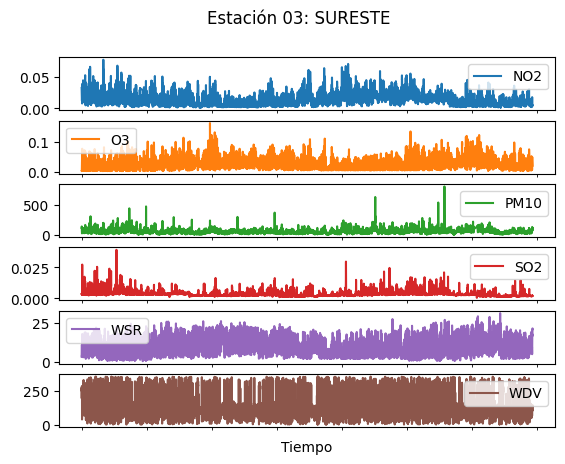

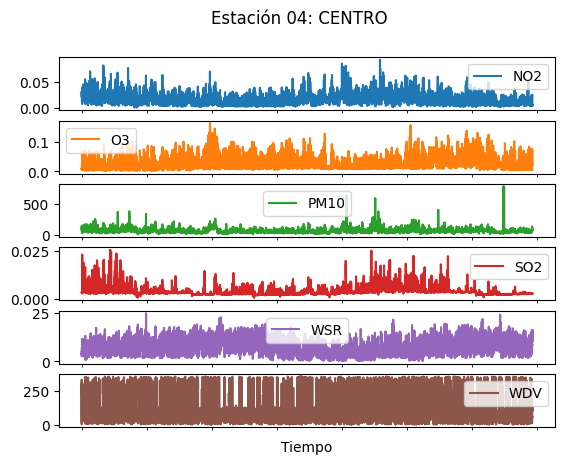

In [121]:
for i in range(len(newData)):
    newData[i].plot(title = f"Estación {i :0>2}: {names[i]}", xlabel = "Tiempo", xticks = [], subplots = True)

<AxesSubplot: >

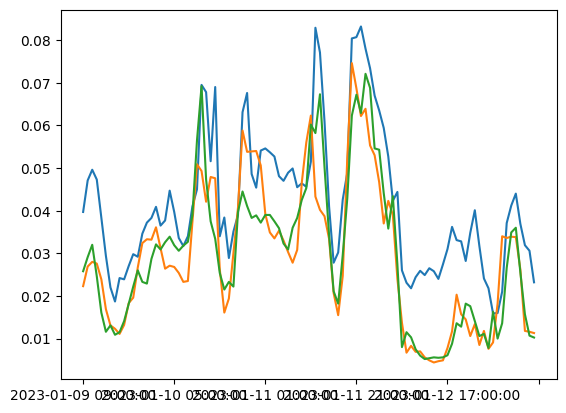

In [130]:
aux = int(random.random() * 250)
newData[0]["NO2"].iloc[aux : aux+100].plot()
newData[1]["NO2"].iloc[aux : aux+100].plot()
newData[2]["NO2"].iloc[aux : aux+100].plot()

## Guardar los Datos Transformados y Revisados

In [123]:
for i in range(len(newData)):
    newData[i].to_csv(f"Output/{i :0>2}.csv")